In [5]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
from statistics import median

f_tab_adni_tau = './data/ADNI_Tau_Amyloid_SUVR_amyloid_tau_status_dems.csv'
f_tab_pet_data = './data/Tabular_Info_PET.csv'

df_adni_tau = pd.read_csv(f_tab_adni_tau, low_memory=False)
df_pet_data = pd.read_csv(f_tab_pet_data, low_memory=False)

### ADNI_Tau_Amyloid_SUVR_amyloid_tau_status_dems

Change the strings in the session column 'ses' to datetime objects to facilitate computing the time differences

In [6]:
df_adni_tau['ses'] = df_adni_tau['ses'].apply(lambda x: datetime.strptime(x, 'ses-%Y-%m-%d'))

#### Number of subjects

In [8]:
unique_id_list = df_adni_tau['ID'].unique()
print(f'Lenth of the DataFrame:    {len(df_adni_tau)}')
print(f'Number of unique subjects:    {len(unique_id_list)}')


Lenth of the DataFrame:    2963
Number of unique subjects:    793


#### Diagnosis change

In the following we can observe that there are subjects for which the diagnosis 'DX' changed between different assesments. 

The subsequent dataframe lists 'DX' for a single patient in chronological order. It stands out that there was a diagnosis "CN" after the patient has been diagnosed as "MCI". Also interesting is, that there is another "CN" diagnosis two years later.

In [9]:
grp_id = df_adni_tau.groupby('ID')
s59 = grp_id.get_group('sub-0059').sort_values(by='ses')[['ID', 'age', 'group', 'pet.modality', 'DX', 'ses']]
s59

,ID,age,group,pet.modality,DX,ses
20,sub-0059,76,CN,pet-AV45,CN,2011-01-03
24,sub-0059,78,CN,pet-AV45,MCI,2012-12-14
22,sub-0059,80,CN,pet-AV45,CN,2015-01-07
23,sub-0059,83,CN,pet-AV1451,MCI,2017-12-12
21,sub-0059,83,CN,pet-AV45,MCI,2017-12-20
19,sub-0059,85,CN,pet-AV45,MCI,2019-12-20


### Plot the frequency of time differences between 2 pet scans from the same person and the same pet modality

In [10]:
time_diff_days = []

grp_id_mod = df_adni_tau.groupby(['ID', 'pet.modality'])
for name, group in grp_id_mod:
    group = group.sort_values(by='ses')[['ID', 'age', 'group', 'pet.modality', 'DX', 'ses']]
    group['delta'] = (group['ses']-group['ses'].shift())
    group['delta'] = group['delta'].apply(lambda x: x.days)
    
    list_td = list(group['delta'])
    list_td = list(filter(lambda x: str(x) != 'nan', list_td))
    time_diff_days += list_td


1394


<AxesSubplot:ylabel='Percent'>

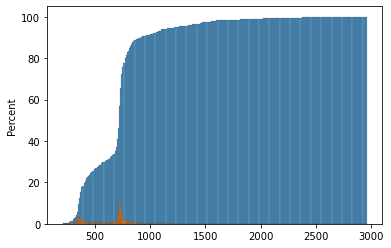

In [13]:
print(len(time_diff_days))
sns.histplot(time_diff_days, stat='percent', cumulative=True, binwidth=10)
sns.histplot(time_diff_days, stat='percent', binwidth=10)

In the plot above can be seen, that two sessions are usually one or two years apart.

## Plot the class distributions over the different modalities 

We can observe that we have a class-imbalance problem since the 'Dementia' class is clearly underrepresented

In [22]:
df_adni_tau['pet.modality'].unique()

array(['pet-AV45', 'pet-AV1451', 'pet-FBB'], dtype=object)

In [23]:
filt_av45 = df_adni_tau['pet.modality'] == 'pet-AV45'
filt_av1451 = df_adni_tau['pet.modality'] == 'pet-AV1451'
filt_fbb = df_adni_tau['pet.modality'] == 'pet-FBB'
df_pet_av45 = df_adni_tau.loc[filt_av45]
df_pet_av1451 = df_adni_tau.loc[filt_av1451]
df_pet_fbb = df_adni_tau.loc[filt_fbb]


<AxesSubplot:xlabel='DX', ylabel='count'>

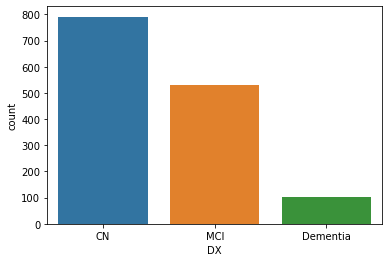

In [24]:
sns.countplot(data=df_pet_av45, x='DX')

<AxesSubplot:xlabel='DX', ylabel='count'>

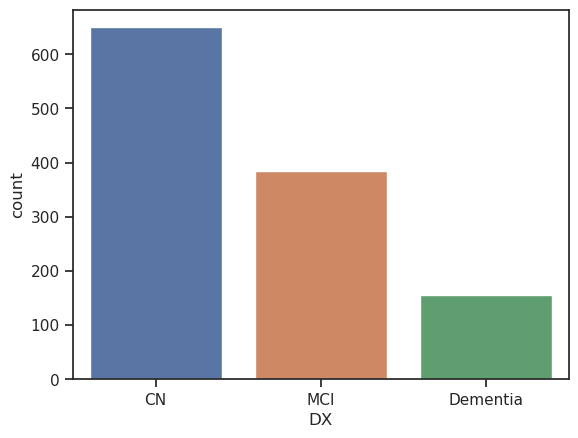

In [166]:
sns.countplot(data=df_pet_av1451, x='DX')

<AxesSubplot:xlabel='DX', ylabel='count'>

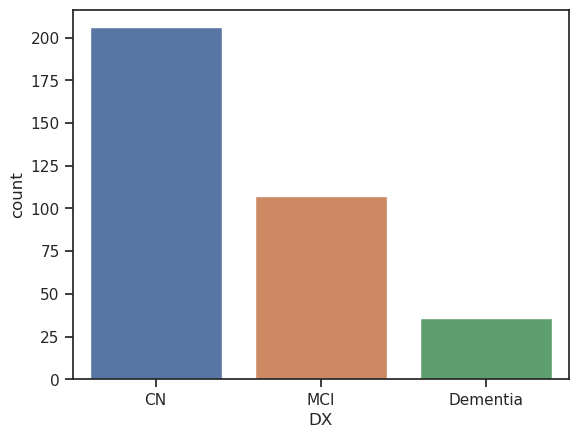

In [167]:
sns.countplot(data=df_pet_fbb, x='DX')

### Overview of keys and values

In [29]:
print(print('\n'.join(list(df_adni_tau.keys()))))

ID
age
sex
group
pet.modality
modality.description
image.id
ses
acq.date
SUVR.Schaefer200.ROI.idx.1
SUVR.Schaefer200.ROI.idx.2
SUVR.Schaefer200.ROI.idx.3
SUVR.Schaefer200.ROI.idx.4
SUVR.Schaefer200.ROI.idx.5
SUVR.Schaefer200.ROI.idx.6
SUVR.Schaefer200.ROI.idx.7
SUVR.Schaefer200.ROI.idx.8
SUVR.Schaefer200.ROI.idx.9
SUVR.Schaefer200.ROI.idx.10
SUVR.Schaefer200.ROI.idx.11
SUVR.Schaefer200.ROI.idx.12
SUVR.Schaefer200.ROI.idx.13
SUVR.Schaefer200.ROI.idx.14
SUVR.Schaefer200.ROI.idx.15
SUVR.Schaefer200.ROI.idx.16
SUVR.Schaefer200.ROI.idx.17
SUVR.Schaefer200.ROI.idx.18
SUVR.Schaefer200.ROI.idx.19
SUVR.Schaefer200.ROI.idx.20
SUVR.Schaefer200.ROI.idx.21
SUVR.Schaefer200.ROI.idx.22
SUVR.Schaefer200.ROI.idx.23
SUVR.Schaefer200.ROI.idx.24
SUVR.Schaefer200.ROI.idx.25
SUVR.Schaefer200.ROI.idx.26
SUVR.Schaefer200.ROI.idx.27
SUVR.Schaefer200.ROI.idx.28
SUVR.Schaefer200.ROI.idx.29
SUVR.Schaefer200.ROI.idx.30
SUVR.Schaefer200.ROI.idx.31
SUVR.Schaefer200.ROI.idx.32
SUVR.Schaefer200.ROI.idx.33
SUVR.Schaefe

In [85]:
df_adni_tau

,ID,age,sex,group,pet.modality,modality.description,image.id,ses,acq.date,SUVR.Schaefer200.ROI.idx.1,...,t.diff.uwn.psych.pet.yrs,ADAS13,MMSE,mPACCtrailsB,t.diff.adas.pet.yrs,PHASE,DX,SITEID,t.diff.diagnosis.pet.yrs,Phase
0,sub-0021,80,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I338512,2012-10-03,2012-10-03,0.912861,...,0.000000,1.00,28.0,1.299940,0.000000,NaN,CN,8,0.021918,ADNI2
1,sub-0021,85,F,CN,pet-AV1451,"AV1451 Coreg, Avg, Standardized Image and Voxe...",I964024,2018-02-02,2018-02-02,1.126000,...,-0.183562,12.33,27.0,-2.151210,-0.183562,NaN,CN,8,0.065753,ADNI3
2,sub-0021,83,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I557331,2015-11-05,2015-11-05,0.899505,...,-0.024658,5.00,27.0,-0.816517,-0.024658,NaN,CN,8,0.013699,ADNI2
3,sub-0021,78,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I196544,2010-10-08,2010-10-08,1.007220,...,-0.002740,4.00,29.0,0.355272,-0.002740,NaN,CN,8,0.027397,ADNIGO
4,sub-0021,85,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I943941,2017-11-28,2017-11-28,0.877004,...,-0.002740,12.33,27.0,-2.151210,-0.002740,NaN,CN,8,0.246575,ADNI3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,sub-6887,73,F,MCI,pet-AV1451,ADNI3-TAU 2 (AC),I1360700,2020-10-27,2020-10-27,1.218620,...,NaN,22.33,26.0,-8.167770,-0.060274,NaN,MCI,26,-0.049315,ADNI3
2959,sub-6888,64,F,MCI,pet-AV1451,PET1 Tau,I1346966,2020-10-07,2020-10-07,1.126700,...,NaN,15.67,26.0,-3.761820,0.000000,NaN,MCI,45,-0.016438,ADNI3
2960,sub-6889,68,M,MCI,pet-AV1451,BRAIN ADNI Tau,I1350177,2020-10-16,2020-10-16,1.183060,...,NaN,29.00,28.0,-5.300670,0.019178,NaN,MCI,24,-0.057534,ADNI3
2961,sub-6890,66,M,MCI,pet-AV1451,AV-1451 PET BRAIN TOF Tau,I1380834,2020-12-01,2020-12-01,1.087770,...,NaN,12.00,29.0,-1.200640,0.000000,NaN,MCI,16,0.035616,ADNI3


### Subject study entry statistics

In [13]:
# Drop all but the first appearance of each subject
df_subject_entry = df_adni_tau.sort_values('ses').drop_duplicates(subset=['ID'])

<AxesSubplot:xlabel='age', ylabel='Count'>

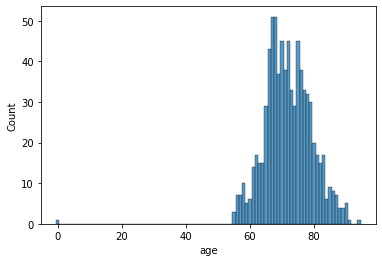

In [18]:
sns.histplot(df_subject_entry, x='age', discrete=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

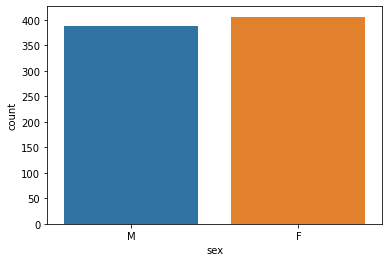

In [38]:
sns.countplot(data=df_subject_entry, x='sex')

<AxesSubplot:xlabel='group', ylabel='count'>

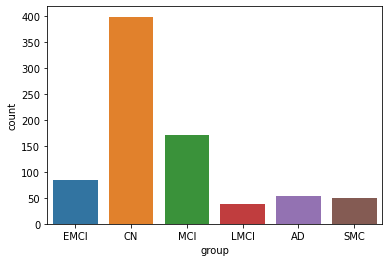

In [39]:
sns.countplot(data=df_subject_entry, x='group')

<AxesSubplot:xlabel='acq.year', ylabel='Count'>

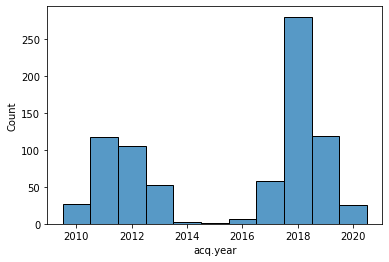

In [19]:
# Add column with year of first session
df_subject_entry['acq.year'] = pd.to_datetime(df_subject_entry['acq.date']).dt.year

sns.histplot(data=df_subject_entry, x='acq.year', discrete=True)

<AxesSubplot:xlabel='MMSE', ylabel='Count'>

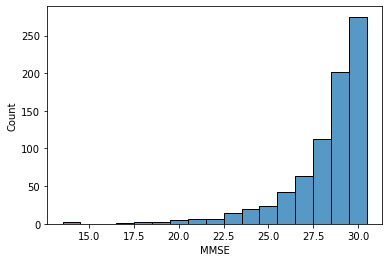

In [20]:
sns.histplot(data=df_subject_entry, x='MMSE', discrete=True)

<AxesSubplot:xlabel='ADAS13', ylabel='Count'>

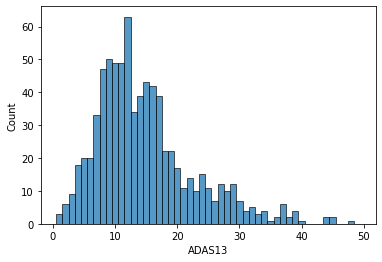

In [21]:
sns.histplot(data=df_subject_entry, x='ADAS13', discrete=True)

<AxesSubplot:xlabel='Phase', ylabel='count'>

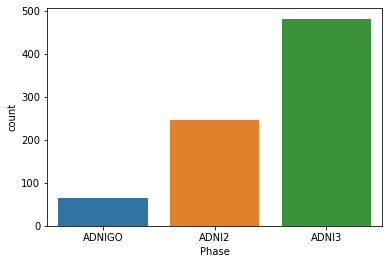

In [52]:
sns.countplot(data=df_subject_entry, x='Phase')

<AxesSubplot:xlabel='apoe', ylabel='count'>

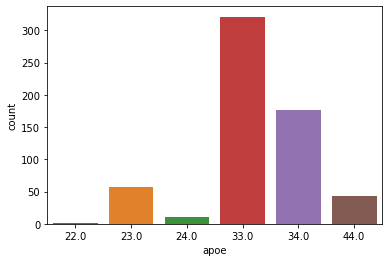

In [53]:
sns.countplot(data=df_subject_entry, x='apoe')

<AxesSubplot:xlabel='centiloid', ylabel='Count'>

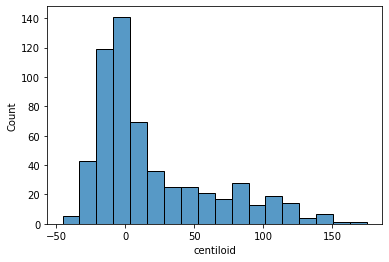

In [54]:
sns.histplot(data=df_subject_entry, x='centiloid')

<AxesSubplot:xlabel='tau.global.SUVR', ylabel='Count'>

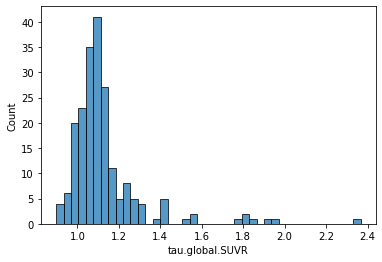

In [55]:
sns.histplot(data=df_subject_entry, x='tau.global.SUVR')

<AxesSubplot:xlabel='mPACCtrailsB', ylabel='Count'>

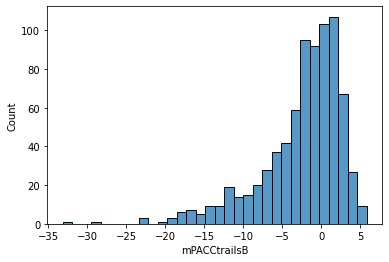

In [56]:
sns.histplot(data=df_subject_entry, x='mPACCtrailsB')

<AxesSubplot:xlabel='SITEID', ylabel='count'>

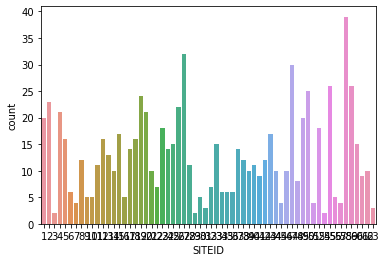

In [57]:
sns.countplot(data=df_subject_entry, x='SITEID')

<AxesSubplot:xlabel='DX', ylabel='count'>

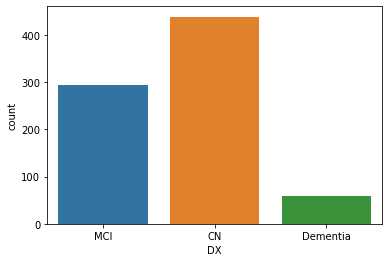

In [58]:
sns.countplot(data=df_subject_entry, x='DX')

<AxesSubplot:xlabel='PTEDUCAT', ylabel='Count'>

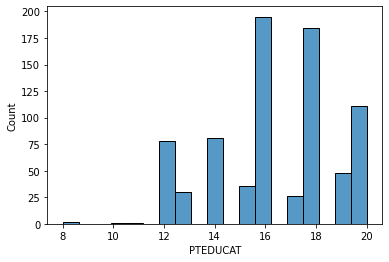

In [62]:
sns.histplot(data=df_subject_entry, x='PTEDUCAT')

<AxesSubplot:xlabel='ADNI_MEM', ylabel='Count'>

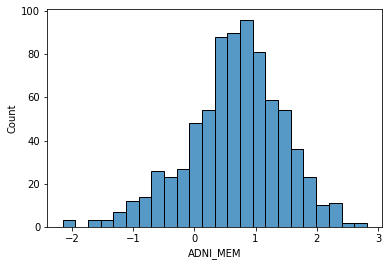

In [63]:
sns.histplot(data=df_subject_entry, x='ADNI_MEM')

<AxesSubplot:xlabel='ADNI_EF', ylabel='Count'>

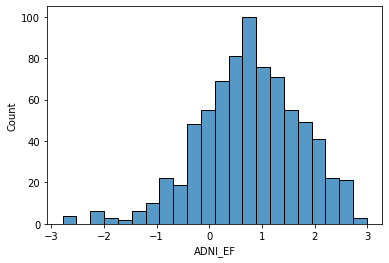

In [64]:
sns.histplot(data=df_subject_entry, x='ADNI_EF')

<AxesSubplot:xlabel='ADNI_LAN', ylabel='Count'>

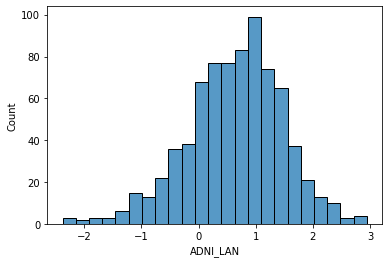

In [65]:
sns.histplot(data=df_subject_entry, x='ADNI_LAN')

<AxesSubplot:xlabel='ADNI_VS', ylabel='Count'>

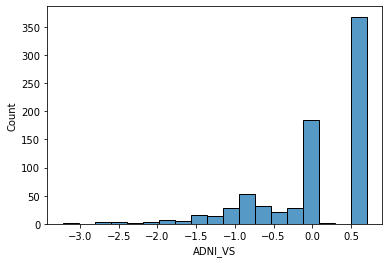

In [66]:
sns.histplot(data=df_subject_entry, x='ADNI_VS')

<AxesSubplot:xlabel='t.diff.uwn.psych.pet.yrs', ylabel='Count'>

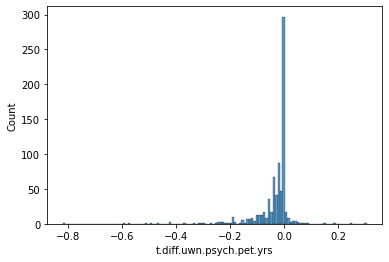

In [67]:
sns.histplot(data=df_subject_entry, x='t.diff.uwn.psych.pet.yrs')

<AxesSubplot:xlabel='t.diff.adas.pet.yrs', ylabel='Count'>

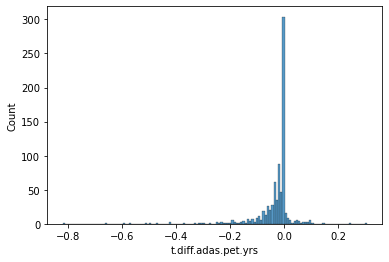

In [68]:
sns.histplot(data=df_subject_entry, x='t.diff.adas.pet.yrs')

<AxesSubplot:xlabel='t.diff.diagnosis.pet.yrs', ylabel='Count'>

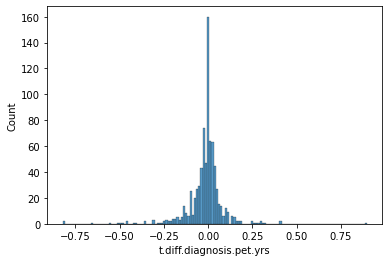

In [69]:
sns.histplot(data=df_subject_entry, x='t.diff.diagnosis.pet.yrs')

### Intra subject change per year

In [9]:
# Select only entries with pet-AV1251 and group them by ID
grp_id = df_adni_tau[df_adni_tau['pet.modality'] == 'pet-AV1451'].groupby(['ID'])

<AxesSubplot:ylabel='Percent'>

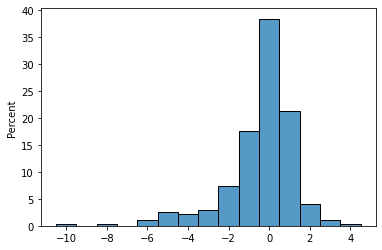

In [28]:
list_delta_MMSE = []

# Calculate median change of MMSE per year for each subject
for _, group in grp_id:
    group = group.sort_values(by='ses')[['ID', 'DX', 'ses', 'MMSE', 'ADAS13', 'ADNI_MEM', 'ADNI_EF', 'ADNI_LAN', 'ADNI_VS']]
    group['delta'] = (group['ses']-group['ses'].shift())
    group['delta'] = group['delta'].apply(lambda x: x.days)
    
    group['delta_MMSE_per_ses'] = (group['MMSE']-group['MMSE'].shift())
    group['delta_MMSE_per_year'] = group['delta_MMSE_per_ses']/group['delta']*365
    
    list_delta_MMSE_sub = list(group['delta_MMSE_per_year'])
    list_delta_MMSE_sub = list(filter(lambda x: str(x) != 'nan', list_delta_MMSE_sub))
    if list_delta_MMSE_sub:
        list_delta_MMSE += [round(median(list_delta_MMSE_sub))]
    
sns.histplot(list_delta_MMSE, stat='percent', discrete=True)

<AxesSubplot:ylabel='Percent'>

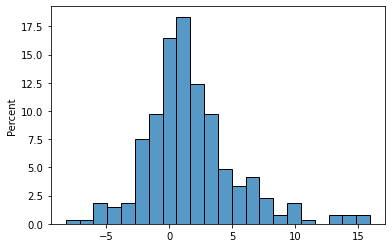

In [24]:
list_delta_ADAS13 = []

# Calculate median change of ADAS13 per year for each subject
for _, group in grp_id:
    group = group.sort_values(by='ses')[['ID', 'DX', 'ses', 'MMSE', 'ADAS13', 'ADNI_MEM', 'ADNI_EF', 'ADNI_LAN', 'ADNI_VS']]
    group['delta'] = (group['ses']-group['ses'].shift())
    group['delta'] = group['delta'].apply(lambda x: x.days)
    
    group['delta_ADAS13_per_ses'] = (group['ADAS13']-group['ADAS13'].shift())
    group['delta_ADAS13_per_year'] = group['delta_ADAS13_per_ses']/group['delta']*365
    
    list_delta_sub = list(group['delta_ADAS13_per_year'])
    list_delta_sub = list(filter(lambda x: str(x) != 'nan', list_delta_sub))
    if list_delta_sub:
        list_delta_ADAS13 += [median(list_delta_sub)]
    
sns.histplot(list_delta_ADAS13, stat='percent')

### Non redundancy reduced statistics

<AxesSubplot:xlabel='pet.modality', ylabel='count'>

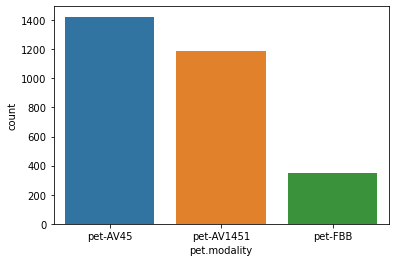

In [70]:
sns.countplot(data=df_adni_tau, x='pet.modality')

### Tabular_Info_PET

In [51]:
print(print('\n'.join(list(df_pet_data.keys()))))

ID
age
sex
pet.modality
ses
apoe
PTEDUCAT
ADNI_MEM
ADNI_EF
ADNI_LAN
ADNI_VS
ADAS13
MMSE
mPACCtrailsB
None
